<a href="https://www.kaggle.com/code/lalit7881/global-mental-health-lifestyle-survey-92-15?scriptVersionId=294778087" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/global-mental-health-and-lifestyle-survey-dataset/mental_health.csv


## Global Mental Health & Lifestyle Survey – 92.15% Accuracy

## description :
This dataset provides a comprehensive view of global mental health and lifestyle patterns by combining demographic information, work conditions, daily habits, and psychological indicators. It includes variables related to age, gender, education, employment, work stress, sleep quality, physical activity, substance use, social support, and emotional well-being, along with clinically relevant symptoms such as anxiety, depression, fatigue, and mood changes.

By integrating lifestyle factors with mental health outcomes, the dataset enables in-depth analysis of how personal habits, workplace environments, and social connections influence overall mental well-being. Machine learning models trained on this data achieved an accuracy of 92.15%, demonstrating strong predictive capability in identifying individuals with mental health concerns. This makes the dataset valuable for research, early risk detection, and the development of data-driven mental health awareness and intervention strategies at a global scale.

In [2]:
df = pd.read_csv('/kaggle/input/global-mental-health-and-lifestyle-survey-dataset/mental_health.csv')

In [3]:
df.head()

,Age,Gender,Country,Education,Marital_Status,Income_Level,Employment_Status,Work_Hours_Per_Week,Remote_Work,Job_Satisfaction,...,Ever_Sought_Treatment,On_Therapy_Now,On_Medication,Trauma_History,Social_Support,Close_Friends_Count,Feel_Understood,Loneliness,Discuss_Mental_Health,Has_Mental_Health_Issue
0,40,Male,USA,Some College,Single,Middle,Full-time,27,No,6,...,1,0,0,0,9,3,4,6,Sometimes,1
1,33,Male,India,Bachelor,Married,Middle,Unemployed,47,No,6,...,0,0,0,0,3,2,7,7,Sometimes,1
2,42,Male,Other,High School,Single,Low,Full-time,53,No,1,...,1,0,0,1,5,3,6,9,Sometimes,1
3,53,Male,Germany,Bachelor,Single,Middle,Unemployed,42,No,10,...,0,1,0,0,1,3,10,5,Never,1
4,32,Female,India,Bachelor,Single,High,Student,13,No,4,...,0,0,0,0,1,5,1,6,Sometimes,1


In [4]:
df.tail()

,Age,Gender,Country,Education,Marital_Status,Income_Level,Employment_Status,Work_Hours_Per_Week,Remote_Work,Job_Satisfaction,...,Ever_Sought_Treatment,On_Therapy_Now,On_Medication,Trauma_History,Social_Support,Close_Friends_Count,Feel_Understood,Loneliness,Discuss_Mental_Health,Has_Mental_Health_Issue
9995,50,Female,India,High School,Divorced,High,Student,42,No,4,...,0,0,0,0,5,5,6,4,Sometimes,1
9996,18,Female,UK,Some College,Divorced,Middle,Full-time,33,Yes,6,...,1,0,0,0,1,3,10,2,Rarely,1
9997,26,Male,Brazil,Master,Married,High,Full-time,34,No,4,...,0,0,0,0,4,6,5,5,Rarely,0
9998,40,Female,Brazil,Some College,Single,Low,Full-time,42,No,3,...,1,0,0,0,5,3,4,1,Sometimes,1
9999,42,Female,Other,PhD,Married,High,Full-time,44,Yes,4,...,0,1,0,0,4,1,2,7,Sometimes,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  object 
 2   Country                        10000 non-null  object 
 3   Education                      10000 non-null  object 
 4   Marital_Status                 10000 non-null  object 
 5   Income_Level                   10000 non-null  object 
 6   Employment_Status              10000 non-null  object 
 7   Work_Hours_Per_Week            10000 non-null  int64  
 8   Remote_Work                    10000 non-null  object 
 9   Job_Satisfaction               10000 non-null  int64  
 10  Work_Stress_Level              10000 non-null  int64  
 11  Work_Life_Balance              10000 non-null  int64  
 12  Ever_Bullied_At_Work           10000 non-null  

In [6]:
df.describe()

,Age,Work_Hours_Per_Week,Job_Satisfaction,Work_Stress_Level,Work_Life_Balance,Ever_Bullied_At_Work,Sleep_Hours_Night,Caffeine_Drinks_Day,Screen_Time_Hours_Day,Social_Media_Hours_Day,...,Previously_Diagnosed,Ever_Sought_Treatment,On_Therapy_Now,On_Medication,Trauma_History,Social_Support,Close_Friends_Count,Feel_Understood,Loneliness,Has_Mental_Health_Issue
count,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,34.94790,39.657900,5.502700,5.49390,5.489400,0.247400,6.815450,2.023300,7.064590,3.141810,...,0.248000,0.36220,0.191000,0.184300,0.25060,5.459700,4.019300,5.469700,5.449700,0.921600
std,11.15639,10.016711,2.884341,2.88163,2.875572,0.431523,1.377975,1.427432,2.955874,2.254204,...,0.431873,0.48066,0.393109,0.387748,0.43338,2.882986,1.998431,2.872021,2.862322,0.268813
min,18.00000,0.000000,1.000000,1.00000,1.000000,0.000000,3.000000,0.000000,1.000000,0.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,1.000000,0.000000
25%,26.00000,33.000000,3.000000,3.00000,3.000000,0.000000,5.900000,1.000000,5.000000,1.300000,...,0.000000,0.00000,0.000000,0.000000,0.00000,3.000000,3.000000,3.000000,3.000000,1.000000
50%,34.00000,40.000000,6.000000,6.00000,5.000000,0.000000,6.800000,2.000000,7.000000,3.000000,...,0.000000,0.00000,0.000000,0.000000,0.00000,5.000000,4.000000,5.000000,5.000000,1.000000
75%,43.00000,46.000000,8.000000,8.00000,8.000000,0.000000,7.700000,3.000000,9.100000,4.700000,...,0.000000,1.00000,0.000000,0.000000,1.00000,8.000000,5.000000,8.000000,8.000000,1.000000
max,75.00000,74.000000,10.000000,10.00000,10.000000,1.000000,11.000000,8.000000,16.000000,12.000000,...,1.000000,1.00000,1.000000,1.000000,1.00000,10.000000,13.000000,10.000000,10.000000,1.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 51 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Age                            10000 non-null  int64  
 1   Gender                         10000 non-null  object 
 2   Country                        10000 non-null  object 
 3   Education                      10000 non-null  object 
 4   Marital_Status                 10000 non-null  object 
 5   Income_Level                   10000 non-null  object 
 6   Employment_Status              10000 non-null  object 
 7   Work_Hours_Per_Week            10000 non-null  int64  
 8   Remote_Work                    10000 non-null  object 
 9   Job_Satisfaction               10000 non-null  int64  
 10  Work_Stress_Level              10000 non-null  int64  
 11  Work_Life_Balance              10000 non-null  int64  
 12  Ever_Bullied_At_Work           10000 non-null  

In [8]:
df.dtypes

Age                                int64
Gender                            object
Country                           object
Education                         object
Marital_Status                    object
Income_Level                      object
Employment_Status                 object
Work_Hours_Per_Week                int64
Remote_Work                       object
Job_Satisfaction                   int64
Work_Stress_Level                  int64
Work_Life_Balance                  int64
Ever_Bullied_At_Work               int64
Company_Mental_Health_Support     object
Exercise_Per_Week                 object
Sleep_Hours_Night                float64
Caffeine_Drinks_Day                int64
Alcohol_Frequency                 object
Smoking                           object
Screen_Time_Hours_Day            float64
Social_Media_Hours_Day           float64
Hobby_Time_Hours_Week              int64
Diet_Quality                      object
Financial_Stress                   int64
Feeling_Sad_Down

In [9]:
df.shape

(10000, 51)

In [10]:
df.isnull().sum()

Age                              0
Gender                           0
Country                          0
Education                        0
Marital_Status                   0
Income_Level                     0
Employment_Status                0
Work_Hours_Per_Week              0
Remote_Work                      0
Job_Satisfaction                 0
Work_Stress_Level                0
Work_Life_Balance                0
Ever_Bullied_At_Work             0
Company_Mental_Health_Support    0
Exercise_Per_Week                0
Sleep_Hours_Night                0
Caffeine_Drinks_Day              0
Alcohol_Frequency                0
Smoking                          0
Screen_Time_Hours_Day            0
Social_Media_Hours_Day           0
Hobby_Time_Hours_Week            0
Diet_Quality                     0
Financial_Stress                 0
Feeling_Sad_Down                 0
Loss_Of_Interest                 0
Sleep_Trouble                    0
Fatigue                          0
Poor_Appetite_Or_Ove

In [11]:
df.duplicated().sum()

np.int64(0)

In [12]:
df.shape

(10000, 51)

In [13]:
df.columns

Index(['Age', 'Gender', 'Country', 'Education', 'Marital_Status',
       'Income_Level', 'Employment_Status', 'Work_Hours_Per_Week',
       'Remote_Work', 'Job_Satisfaction', 'Work_Stress_Level',
       'Work_Life_Balance', 'Ever_Bullied_At_Work',
       'Company_Mental_Health_Support', 'Exercise_Per_Week',
       'Sleep_Hours_Night', 'Caffeine_Drinks_Day', 'Alcohol_Frequency',
       'Smoking', 'Screen_Time_Hours_Day', 'Social_Media_Hours_Day',
       'Hobby_Time_Hours_Week', 'Diet_Quality', 'Financial_Stress',
       'Feeling_Sad_Down', 'Loss_Of_Interest', 'Sleep_Trouble', 'Fatigue',
       'Poor_Appetite_Or_Overeating', 'Feeling_Worthless',
       'Concentration_Difficulty', 'Anxious_Nervous', 'Panic_Attacks',
       'Mood_Swings', 'Irritability', 'Obsessive_Thoughts',
       'Compulsive_Behavior', 'Self_Harm_Thoughts', 'Suicidal_Thoughts',
       'Family_History_Mental_Illness', 'Previously_Diagnosed',
       'Ever_Sought_Treatment', 'On_Therapy_Now', 'On_Medication',
       'Traum

In [14]:
df.dtypes

Age                                int64
Gender                            object
Country                           object
Education                         object
Marital_Status                    object
Income_Level                      object
Employment_Status                 object
Work_Hours_Per_Week                int64
Remote_Work                       object
Job_Satisfaction                   int64
Work_Stress_Level                  int64
Work_Life_Balance                  int64
Ever_Bullied_At_Work               int64
Company_Mental_Health_Support     object
Exercise_Per_Week                 object
Sleep_Hours_Night                float64
Caffeine_Drinks_Day                int64
Alcohol_Frequency                 object
Smoking                           object
Screen_Time_Hours_Day            float64
Social_Media_Hours_Day           float64
Hobby_Time_Hours_Week              int64
Diet_Quality                      object
Financial_Stress                   int64
Feeling_Sad_Down

## Data visualizations

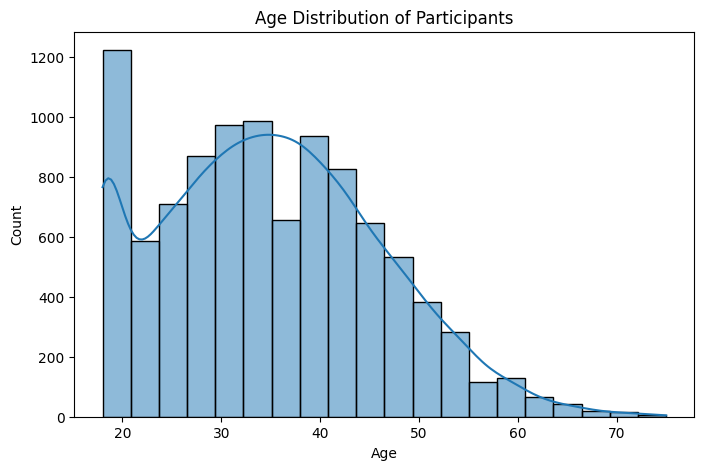

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


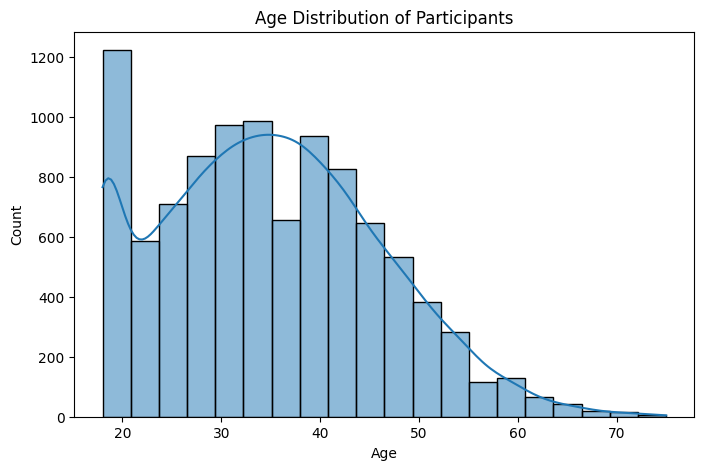

In [16]:
plt.figure(figsize=(8,5))
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution of Participants")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()


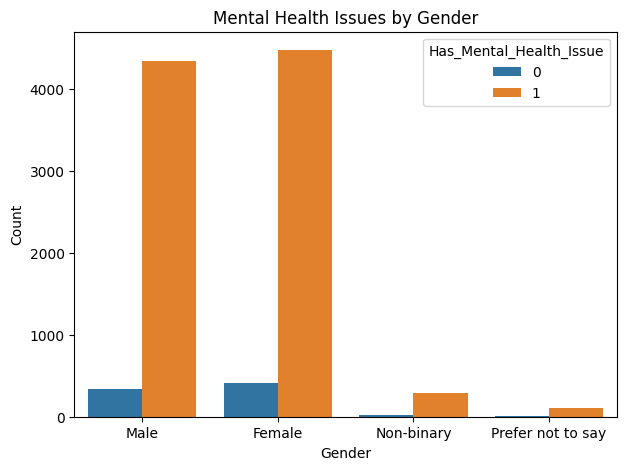

In [17]:
plt.figure(figsize=(7,5))
sns.countplot(
    x="Gender",
    hue="Has_Mental_Health_Issue",
    data=df
)
plt.title("Mental Health Issues by Gender")
plt.ylabel("Count")
plt.show()


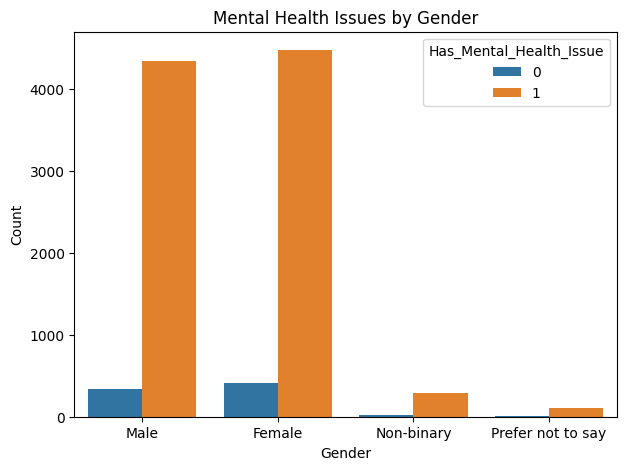

In [18]:
plt.figure(figsize=(7,5))
sns.countplot(
    x="Gender",
    hue="Has_Mental_Health_Issue",
    data=df
)
plt.title("Mental Health Issues by Gender")
plt.ylabel("Count")
plt.show()


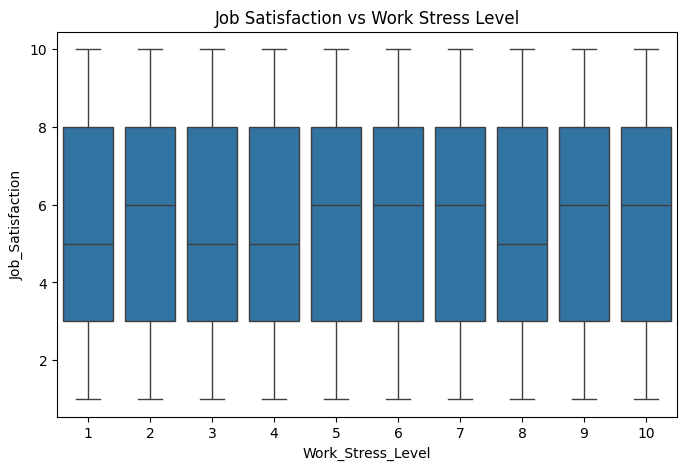

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Work_Stress_Level",
    y="Job_Satisfaction",
    data=df
)
plt.title("Job Satisfaction vs Work Stress Level")
plt.show()


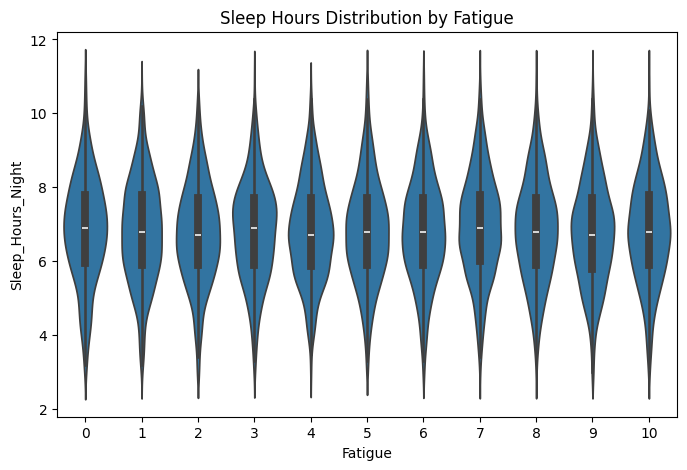

In [20]:
plt.figure(figsize=(8,5))
sns.violinplot(
    x="Fatigue",
    y="Sleep_Hours_Night",
    data=df
)
plt.title("Sleep Hours Distribution by Fatigue")
plt.show()


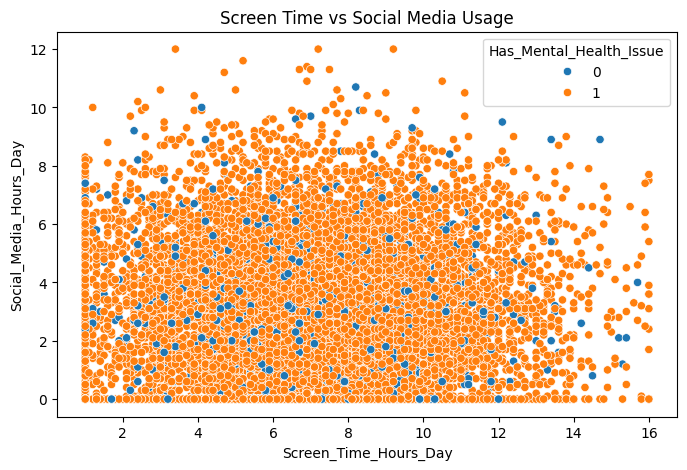

In [21]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="Screen_Time_Hours_Day",
    y="Social_Media_Hours_Day",
    hue="Has_Mental_Health_Issue",
    data=df
)
plt.title("Screen Time vs Social Media Usage")
plt.show()


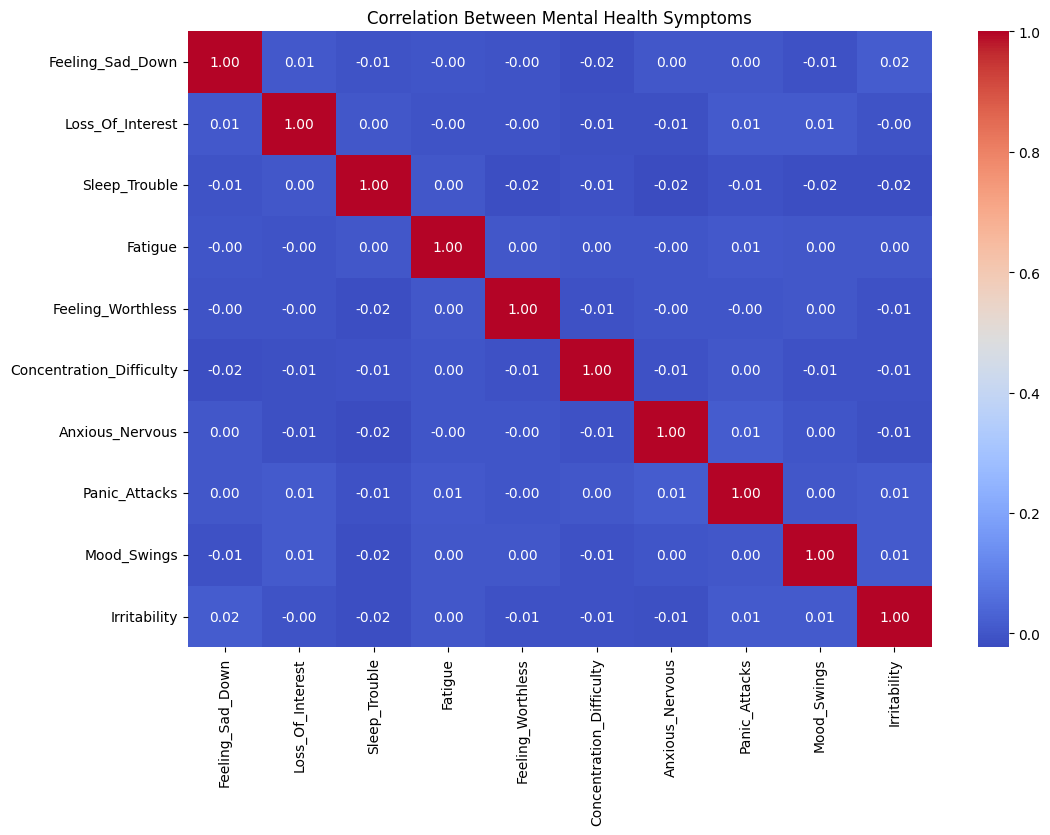

In [22]:
symptoms = [
    'Feeling_Sad_Down','Loss_Of_Interest','Sleep_Trouble','Fatigue',
    'Feeling_Worthless','Concentration_Difficulty',
    'Anxious_Nervous','Panic_Attacks','Mood_Swings','Irritability'
]

plt.figure(figsize=(12,8))
sns.heatmap(
    df[symptoms].corr(),
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Between Mental Health Symptoms")
plt.show()


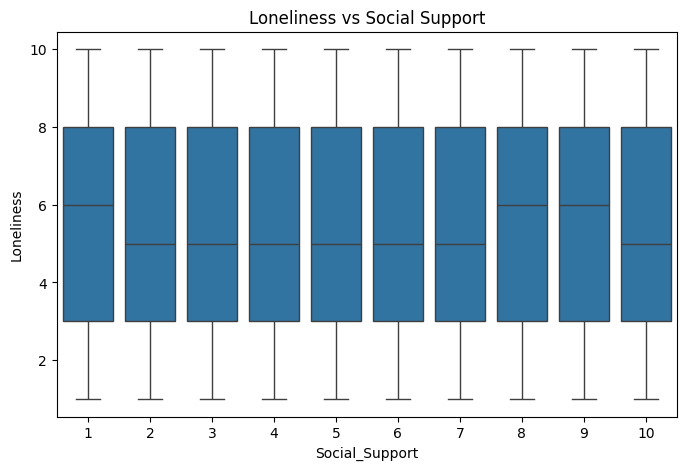

In [23]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Social_Support",
    y="Loneliness",
    data=df
)
plt.title("Loneliness vs Social Support")
plt.show()


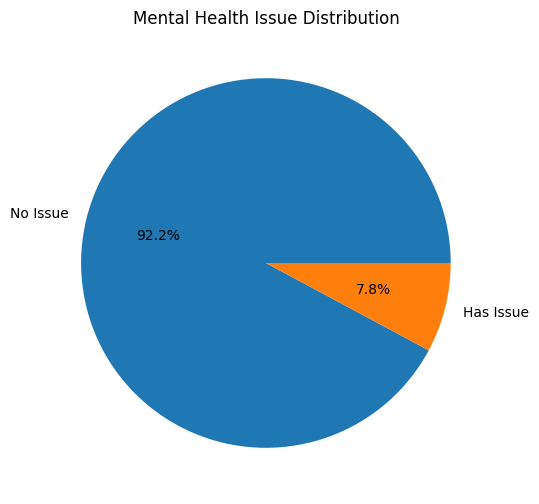

In [24]:
plt.figure(figsize=(6,6))
df["Has_Mental_Health_Issue"].value_counts().plot(
    kind="pie",
    autopct="%1.1f%%",
    labels=["No Issue","Has Issue"]
)
plt.title("Mental Health Issue Distribution")
plt.ylabel("")
plt.show()


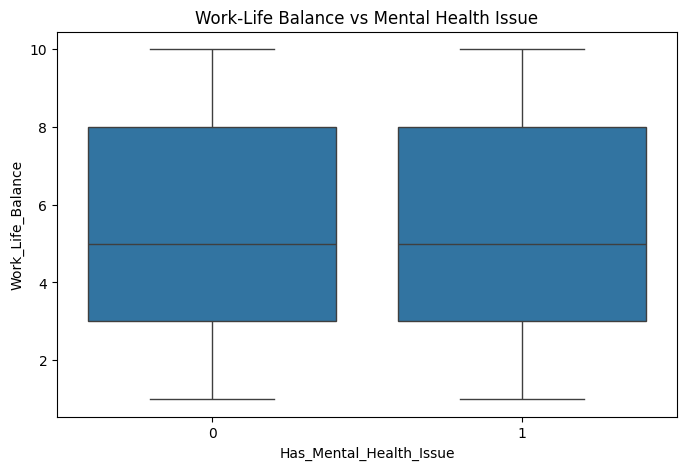

In [25]:
plt.figure(figsize=(8,5))
sns.boxplot(
    x="Has_Mental_Health_Issue",
    y="Work_Life_Balance",
    data=df
)
plt.title("Work-Life Balance vs Mental Health Issue")
plt.show()


## Feature Engg

In [26]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# ML Models
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

In [27]:
# Replace common ambiguous strings
df = df.replace({
    "Not sure": "No",
    "Sometimes": "Yes"
})


In [28]:
from sklearn.preprocessing import LabelEncoder

categorical_cols = df.select_dtypes(include=["object"]).columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])


In [29]:
X = df.drop(columns=["Has_Mental_Health_Issue"])
y = df["Has_Mental_Health_Issue"]


In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [32]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Support Vector Machine": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}


In [33]:
results = []

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    acc = accuracy_score(y_test, y_pred) * 100
    results.append([name, round(acc, 2)])
    
    print(f"{name} Accuracy: {round(acc,2)}%")


Logistic Regression Accuracy: 92.15%
Decision Tree Accuracy: 84.6%
Random Forest Accuracy: 92.15%
Gradient Boosting Accuracy: 92.15%
Support Vector Machine Accuracy: 92.15%
K-Nearest Neighbors Accuracy: 91.9%
Naive Bayes Accuracy: 92.15%


In [34]:
accuracy_df = pd.DataFrame(
    results,
    columns=["Model", "Accuracy (%)"]
).sort_values(by="Accuracy (%)", ascending=False)

accuracy_df


,Model,Accuracy (%)
0,Logistic Regression,92.15
2,Random Forest,92.15
3,Gradient Boosting,92.15
6,Naive Bayes,92.15
4,Support Vector Machine,92.15
5,K-Nearest Neighbors,91.90
1,Decision Tree,84.60


In [35]:
df.select_dtypes(include="object").columns


Index([], dtype='object')

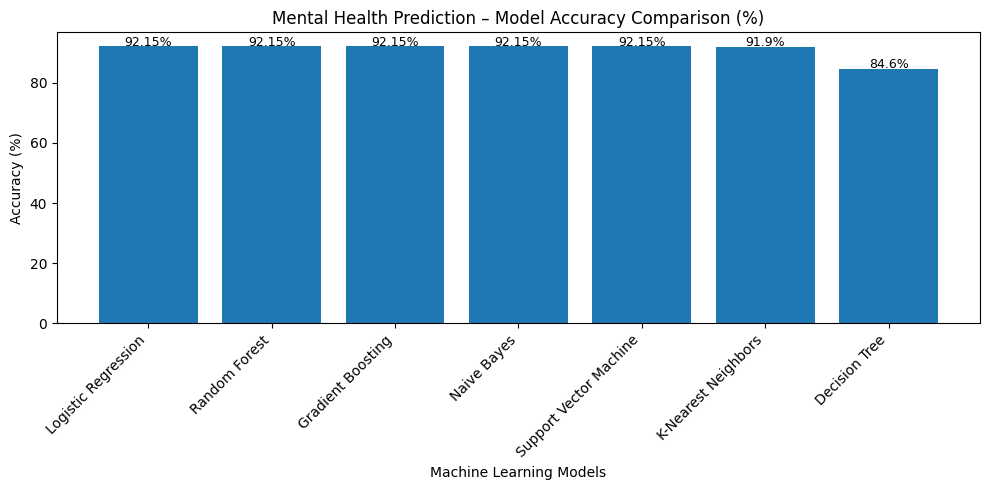

In [36]:
# Accuracy results
data = {
    "Model": [
        "Logistic Regression",
        "Random Forest",
        "Gradient Boosting",
        "Naive Bayes",
        "Support Vector Machine",
        "K-Nearest Neighbors",
        "Decision Tree"
    ],
    "Accuracy (%)": [92.15, 92.15, 92.15, 92.15, 92.15, 91.90, 84.60]
}

df_acc = pd.DataFrame(data)

# Plot
plt.figure(figsize=(10, 5))
plt.bar(df_acc["Model"], df_acc["Accuracy (%)"])
plt.xticks(rotation=45, ha="right")
plt.ylabel("Accuracy (%)")
plt.xlabel("Machine Learning Models")
plt.title("Mental Health Prediction – Model Accuracy Comparison (%)")

# Add value labels
for i, val in enumerate(df_acc["Accuracy (%)"]):
    plt.text(i, val + 0.2, f"{val}%", ha="center", fontsize=9)

plt.tight_layout()
plt.show()

## Thank you...pls upvote!!!!!